In [1]:
import ROOT,os,glob,math
Path="./Ntuples/mc16d_22jun20/"
QCDpaths=glob.glob(Path+"*JZ*root")
VJETSpaths=glob.glob(Path+"*CT10*root")
Signalpaths=glob.glob(Path+"*qqqq*root")
#print(QCDpaths)
#print(VJETSpaths)
#print(Signalpaths)
for path in Signalpaths:
    #print(os.path.getsize(path))
    #print(os.stat(path).st_size)
    #if os.path.getsize(path)<100000.0:
    if os.stat(path).st_size<10000.0:
        Signalpaths.remove(path)
#Signalpaths.remove("./Ntuples/mc16d_22jun20/XH_qqqq_m1000_m130.root")
Signalpaths.remove("./Ntuples/mc16d_22jun20/XH_qqqq_m3000_m130.root")
#Signalpaths.remove("./Ntuples/mc16d_22jun20/XH_qqqq_m3400_m65.root")
#print(sorted(Signalpaths))

Welcome to JupyROOT 6.18/00


Name:  Title:  NbinsX: 100


Info in <TCanvas::Print>: pdf file figures/LeadJetPtcut.pdf has been created
Info in <TCanvas::Print>: jpg file figures/LeadJetPtcut.jpg has been created


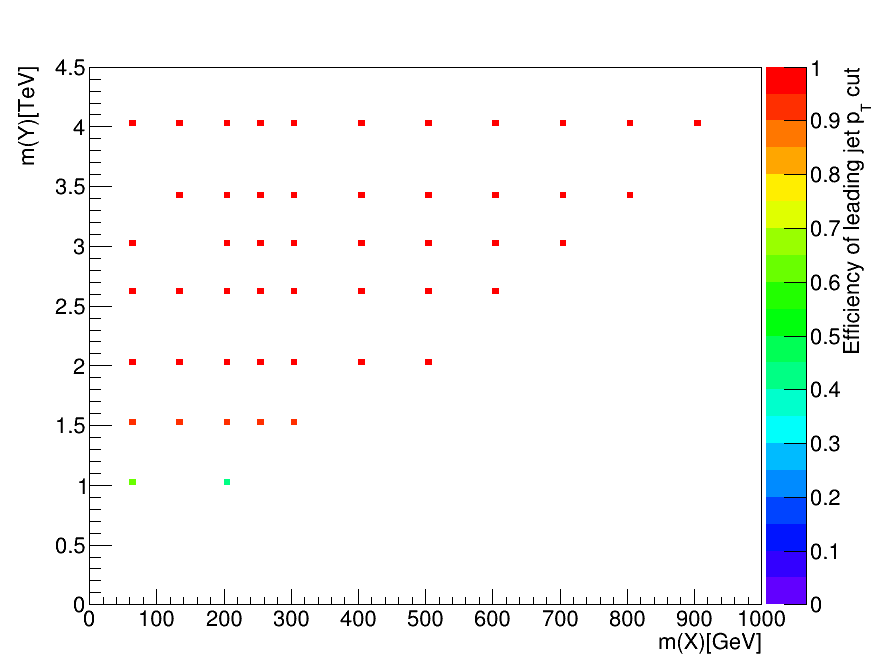

In [2]:
h=ROOT.TH2F("","",100,0,1000,90,0,4.5)
print(h)
for path in sorted(Signalpaths):
    N_total=0.0
    N_Jet1pt=0.0
    fpath=ROOT.TFile(path,"r")
    tpath=fpath.Get("Nominal")
    N=tpath.GetEntries()
    signal=path.split("/")[-1].split(".")[0].split("_")
    mY=int(signal[2][1:])
    mX=int(signal[3][1:])
    binY=int(mY/50+1)
    binX=int(mX/10+1)
    #print(path,N,mY,mX,binY,binX)
    for i in range(N):
        tpath.GetEntry(i)
        N_total=N_total+tpath.weight
        if tpath.Jet1_pT>=450:
        #if tpath.HCand_isHWindow==1:
        #if tpath.HCand_nBTags>0:
        #if tpath.Jet1_pT>=450 and tpath.Jet2_pT>=250 and tpath.HCand_isHWindow==1 and tpath.HCand_nBTags>0:
            N_Jet1pt=N_Jet1pt+tpath.weight
    fraction=N_Jet1pt/N_total
    #print(binX,binY,fraction)
    h.SetBinContent(binX,binY,fraction)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(1)
h.GetXaxis().SetTitle("m(X)[GeV]")
h.GetYaxis().SetTitle("m(Y)[TeV]")
h.GetZaxis().SetRangeUser(0.,1.0);
h.GetZaxis().SetTitle("Efficiency of leading jet p_{T} cut")
#h.GetZaxis().SetTitle("Efficiency of m_{H} window cut")
#h.GetZaxis().SetTitle("Efficiency of H b-tag>0 cut")
#h.GetZaxis().SetTitle("SR Efficiency")
h.Draw("COLZ")
c1.Draw()
fname="figures/LeadJetPtcut"
#fname="figures/mHwindowcut"
#fname="figures/Hbtagcut"
#fname="figures/SR"
c1.SaveAs(fname+".pdf")
c1.SaveAs(fname+".jpg")